llama3.1
llama3
mistral
mistral-nemo
phi3
gemma2
qwen
llava
zephyr

codellama
codegemma
sqlcoder
dolphincoder
codeqwen
starcoder2
stable-code
wizardcoder
deepseek-coder-v2

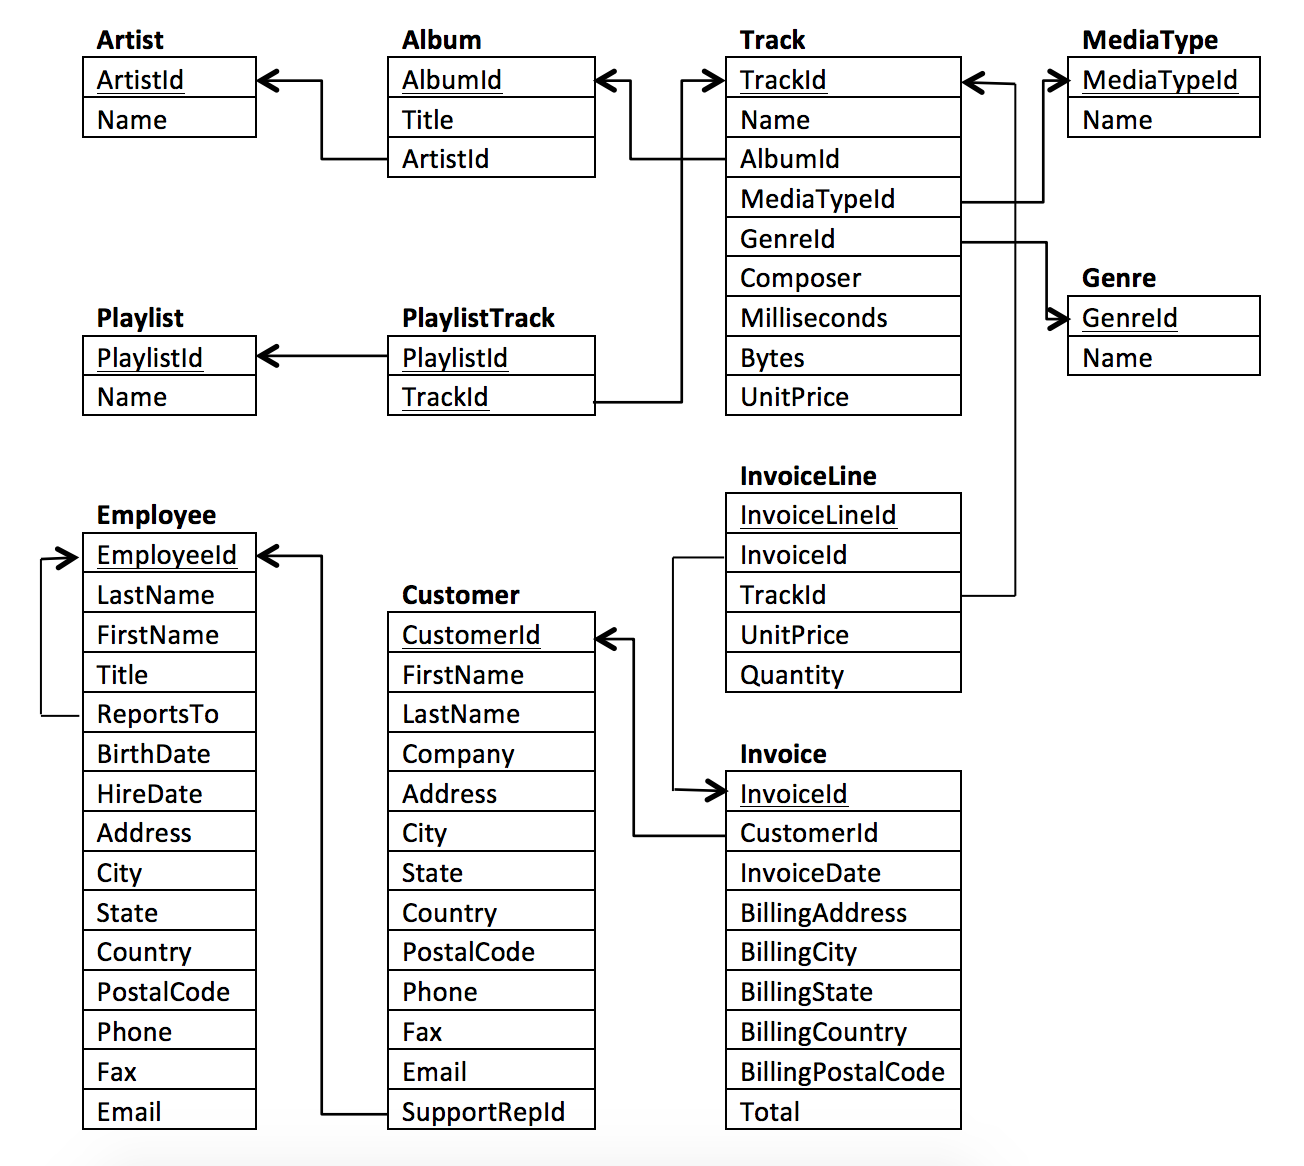

In [1]:
# @hidden_cell
from IPython.display import Image
schema="https://m-soro.github.io/Business-Analytics/SQL-for-Data-Analysis/L4-Project-Query-Music-Store/Misc/001.png"
Image(schema)

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv("data/chinook_txt2sql.csv")
df.head()

,question,query,answer,db_answer
0,How many albums are there?,SELECT COUNT(*) FROM album,347,347
1,How many distinct genres are there?,SELECT COUNT(DISTINCT genre_id) FROM track,25,25
2,How many tracks are in the 'Rock' genre?,SELECT COUNT(*) FROM track t JOIN genre g ON t...,1297,1297
3,What is the total number of invoice lines?,SELECT COUNT(*) FROM invoice_line,2240,2240
4,How many customers are from the USA?,SELECT COUNT(*) FROM customer WHERE country = ...,13,13


In [3]:
queries = df["question"]
queries

0                            How many albums are there?
1                   How many distinct genres are there?
2              How many tracks are in the 'Rock' genre?
3            What is the total number of invoice lines?
4                  How many customers are from the USA?
5                      What is the highest employee ID?
6     How many tracks have a length greater than 5 m...
7     What is the total number of bytes for all tracks?
8     How many customers have a company name specified?
9                    How many tracks cost more than $1?
10    What is the total number of seconds for all tr...
11              How many invoices were created in 2021?
12    What is the number of customers who have made ...
13           How many artists have more than 10 albums?
14    What is the total number of tracks in playlist...
15    How many customers have made purchases in all ...
16    What is the number of customers who have purch...
17    How many albums have all their tracks in a

HAVING
GROUP BY
WHERE
COUNT
DISTINCT
JOIN
DATETIME
EXTRACT
AVG, SUM, MAX

In [5]:
24*18*5

2160

In [6]:
from sqlalchemy import create_engine

from llama_index.core.query_engine import NLSQLTableQueryEngine
from llama_index.core import SQLDatabase
from llama_index.llms.ollama import Ollama

In [7]:
database = "chinook"
username = "postgres"
password = "password"
host = "localhost"
port = "5432"
db_uri = f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}"

In [8]:
engine = create_engine(db_uri)
sql_database = SQLDatabase(engine)
llm = Ollama(model="llama3")
query_engine = NLSQLTableQueryEngine(sql_database=sql_database, llm=llm)

In [9]:
query_str = "How many customers do we have?"
response = query_engine.query(query_str)
response

Response(response='Based on the query results, I can synthesize a response to the input question.\n\nHere\'s my response:\n\n"We have **59** customers."\n\nLet me know if you\'d like me to generate any additional responses or handle more complex queries!', source_nodes=[NodeWithScore(node=TextNode(id_='e4c1ad34-bbf6-4fcd-b17e-740a94e6ee34', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='[(59,)]', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n'), score=None)], metadata={'e4c1ad34-bbf6-4fcd-b17e-740a94e6ee34': {}, 'sql_query': 'SELECT COUNT(*) FROM customer;', 'result': [(59,)], 'col_keys': ['count']})

In [13]:
print(response.metadata['sql_query'])
print("......")
print(response.metadata['result'])
print("....")
print(response.response)

SELECT COUNT(*) FROM customer;
......
[(59,)]
....
Based on the query results, I can synthesize a response to the input question.

Here's my response:

"We have **59** customers."

Let me know if you'd like me to generate any additional responses or handle more complex queries!


In [14]:
ollms_gen = ["llama3.1", "llama3", "mistral", 
             "mistral-nemo", "phi3", "gemma2", 
             "zephyr", "qwen2:7b", "llava"]  

ollms_code = ["codellama", "codegemma", "codeqwen", 
              "dolphincoder", "sqlcoder", "deepseek-coder-v2",
             "stable-code", "starcoder2:7b", "wizardcoder"]

ollms = ollms_gen + ollms_code
print(len(ollms))

18


In [ ]:
# ollms = ["llama3.1", "codellama"]
# ollms = ["starcoder2:7b", "qwen2:7b", "stable-code"]

In [ ]:
df_sql_query = pd.DataFrame()
df_sql_result = pd.DataFrame()
df_llm_result = pd.DataFrame()

df_sql_query['query'] = queries
df_sql_result['query'] = queries
df_llm_result['query'] = queries


for ollm in ollms:
    llm = Ollama(model=ollm)
    
    sql_query_l = []
    sql_result_l = []
    llm_result_l = []
    
    for query in queries:
        print(ollm, "---", query)
        
        query_engine = NLSQLTableQueryEngine(
            sql_database=sql_database, 
            llm=llm
            )
        
        try:
            response = query_engine.query(query)
            sql_query = response.metadata['sql_query']
            sql_result = response.metadata['result']
            llm_result = response.response
        except:
            sql_query = None
            sql_result = None
            llm_result = None
            
        sql_query_l.append(sql_query)
        sql_result_l.append(sql_result)
        llm_result_l.append(llm_result)
        
    df_sql_query[ollm] = sql_query_l
    df_sql_result[ollm] = sql_result_l
    df_llm_result[ollm] = llm_result_l
    

df_sql_query.to_csv("data/sql_queries_r5.csv", index=False)  
df_sql_result.to_csv("data/sql_results_r5.csv", index=False)           
df_llm_result.to_csv("data/llm_results_r5.csv", index=False)           

llama3.1 --- How many albums are there?
llama3.1 --- How many distinct genres are there?
llama3.1 --- How many tracks are in the 'Rock' genre?
llama3.1 --- What is the total number of invoice lines?
llama3.1 --- How many customers are from the USA?
llama3.1 --- What is the highest employee ID?
llama3.1 --- How many tracks have a length greater than 5 minutes (300000 milliseconds)?
llama3.1 --- What is the total number of bytes for all tracks?
llama3.1 --- How many customers have a company name specified?
llama3.1 --- How many tracks cost more than $1?
llama3.1 --- What is the total number of seconds for all tracks?
llama3.1 --- How many invoices were created in 2021?
llama3.1 --- What is the number of customers who have made purchases totaling over $40?
llama3.1 --- How many artists have more than 10 albums?
llama3.1 --- What is the total number of tracks in playlists that have 'Rock' in their name?
llama3.1 --- How many customers have made purchases in all years the store has been ope

phi3 --- How many tracks appear in more playlists than the average track?
phi3 --- What is the number of artists who have tracks in more genres than the average artist?
phi3 --- What is the total number of 'Rock' tracks that are longer than the average 'Jazz' track?
phi3 --- What is the number of tracks that have a longer duration than the average duration of tracks in their genre?
phi3 --- How many employees have sold to customers from all countries represented in the customer base?
gemma2 --- How many albums are there?
gemma2 --- How many distinct genres are there?
gemma2 --- How many tracks are in the 'Rock' genre?
gemma2 --- What is the total number of invoice lines?
gemma2 --- How many customers are from the USA?
gemma2 --- What is the highest employee ID?
gemma2 --- How many tracks have a length greater than 5 minutes (300000 milliseconds)?
gemma2 --- What is the total number of bytes for all tracks?
gemma2 --- How many customers have a company name specified?
gemma2 --- How many

codellama --- What is the total number of tracks in playlists that have 'Rock' in their name?
codellama --- How many customers have made purchases in all years the store has been operating?
codellama --- What is the number of customers who have purchased tracks from all genres?
codellama --- How many albums have all their tracks in a single genre?
codellama --- What is the number of customers who have spent more in 2011 than in 2010?
codellama --- How many tracks appear in more playlists than the average track?
codellama --- What is the number of artists who have tracks in more genres than the average artist?
codellama --- What is the total number of 'Rock' tracks that are longer than the average 'Jazz' track?
codellama --- What is the number of tracks that have a longer duration than the average duration of tracks in their genre?
codellama --- How many employees have sold to customers from all countries represented in the customer base?
codegemma --- How many albums are there?
codegem

In [ ]:
df = pd.read_csv("data/chinook_txt2sql.csv")
df_results = df.copy()

In [ ]:
for ollm in ollms:
    df_results[ollm] = df_sql_result[ollm]
    #df_results[ollm] = df_results[ollm].apply(lambda x: x[0][0] if x is not None and len(x) > 0 else None)
    df_results[ollm] = df_results[ollm].apply(lambda x: x[0][0] if isinstance(x, (list, tuple)) and len(x) > 0 and len(x[0]) > 0 else None)
    #df_results[ollm] = df_results[ollm].astype('Int64')
    df_results[ollm] = pd.to_numeric(df_results[ollm], errors='coerce')
    df_results[ollm] = df_results[ollm].fillna(9999999999).astype("int")

In [ ]:
df_results

In [ ]:
results = {}

for ollm in ollms:
    correct_count = (df_results['db_answer'] == df_results[ollm]).sum()
    results[ollm] = correct_count

df_summary = pd.DataFrame.from_dict(results, orient='index', columns=['Correct Answers'])

total_questions = len(df_results)
df_summary['Percentage Correct'] = (df_summary['Correct Answers'] / total_questions) * 100

#df_summary['Percentage Correct'] = df_summary['Percentage Correct'].astype('Int64')

df_summary['model'] = df_summary.index
df_summary['Percentage Correct'] = df_summary['Percentage Correct'].astype('int')

df_summary  = df_summary.sort_values('Correct Answers', ascending=False)

df_summary.reset_index(drop=True, inplace=True)

df_summary 

In [ ]:
df_summary.to_csv("data/summary_r5.csv", index=False)

In [ ]:
!pwd